In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

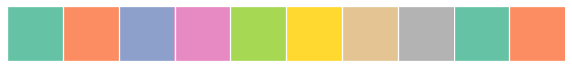

In [3]:
sns.set_palette('Set2', 10)
sns.palplot(sns.color_palette())
sns.set_context('talk')

In [4]:
data = pd.read_csv('https://rawgit.com/Qaqi/cs210project/master/ign_new.csv',sep=';' ,index_col=['gameid'])
data.head(3)

,score_phrase,score_phrase_enum,title,score,genre,genre_enum,editors_choice,release_year,release_month
gameid,,,,,,,,,
0,Amazing,9,LittleBigPlanet PS Vita,9.0,Platformer,1,Y,2012,9
3,Great,8,NHL 13,8.5,Sports,2,N,2012,9
7,Amazing,9,Guild Wars 2,9.0,RPG,3,Y,2012,9


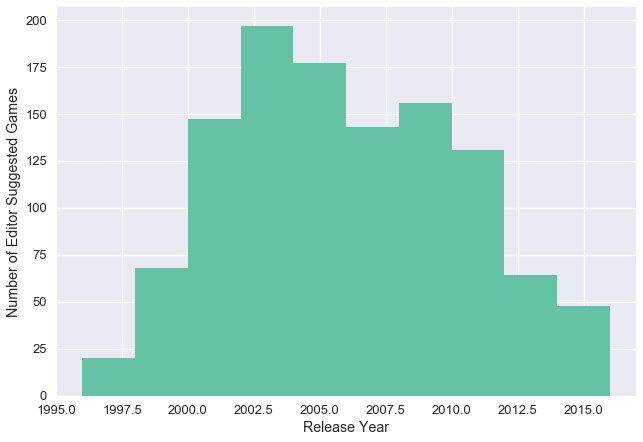

In [5]:
d = data.dropna()
plt.hist(d[d.editors_choice=='Y'].release_year)
plt.xlabel('Release Year')
plt.ylabel('Number of Editor Suggested Games');

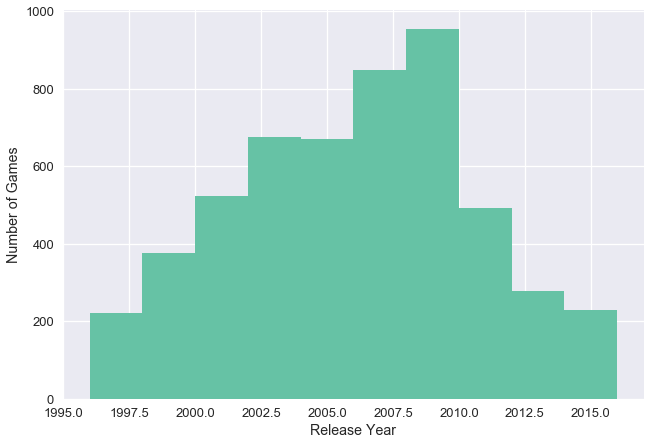

In [6]:
d = data.dropna()
plt.hist(d.release_year)
plt.xlabel('Release Year')
plt.ylabel('Number of Games');

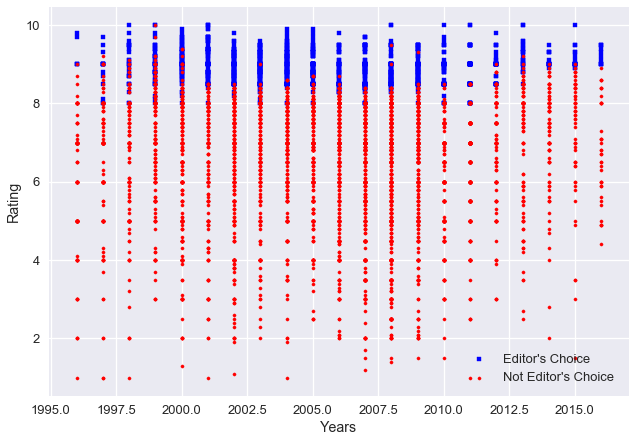

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(d[d.editors_choice=='Y'].release_year, d[d.editors_choice=='Y'].score, s=10, c='b', marker="s", label='Editor\'s Choice')
ax1.scatter(d[d.editors_choice=='N'].release_year, d[d.editors_choice=='N'].score, s=10, c='r', marker="o", label='Not Editor\'s Choice ')
ax1.set_xlabel('Years')
ax1.set_ylabel('Rating')
plt.legend(loc='lower right');
plt.show()

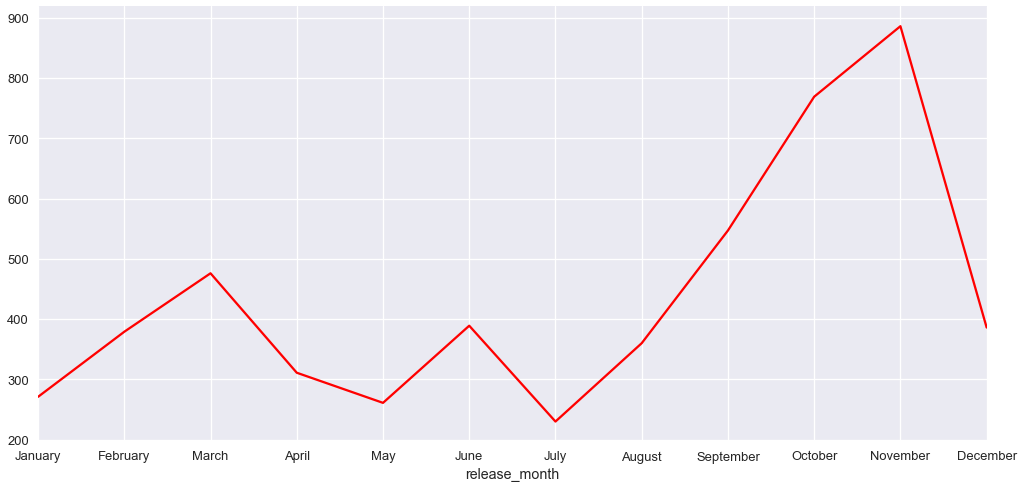

In [9]:
plt.figure(figsize=(17,8))
plt.xticks(range(1,13),['January','February','March','April','May','June',
            'July','August','September','October','November','December'])
data.groupby(['release_month']).size().plot(c='r')

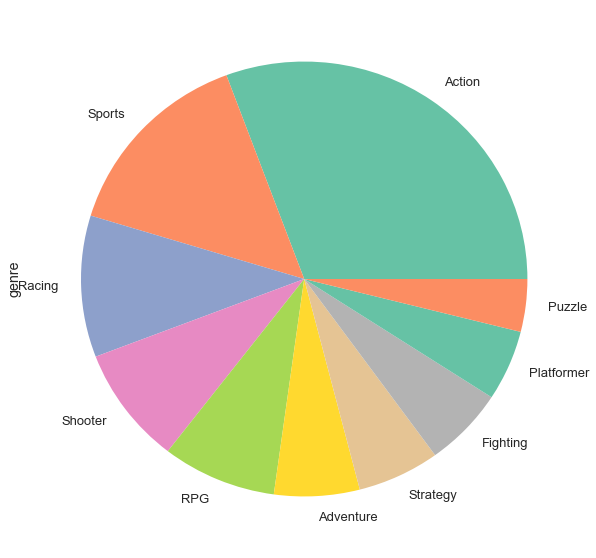

In [10]:
data.genre.value_counts()[:10].plot.pie(figsize=(10,10))

In [11]:
genres = data.groupby('genre')['genre']
genres_count=genres.count()
large_genres=genres_count[genres_count>=150]
large_genres.sort_values(ascending=False,inplace=True)

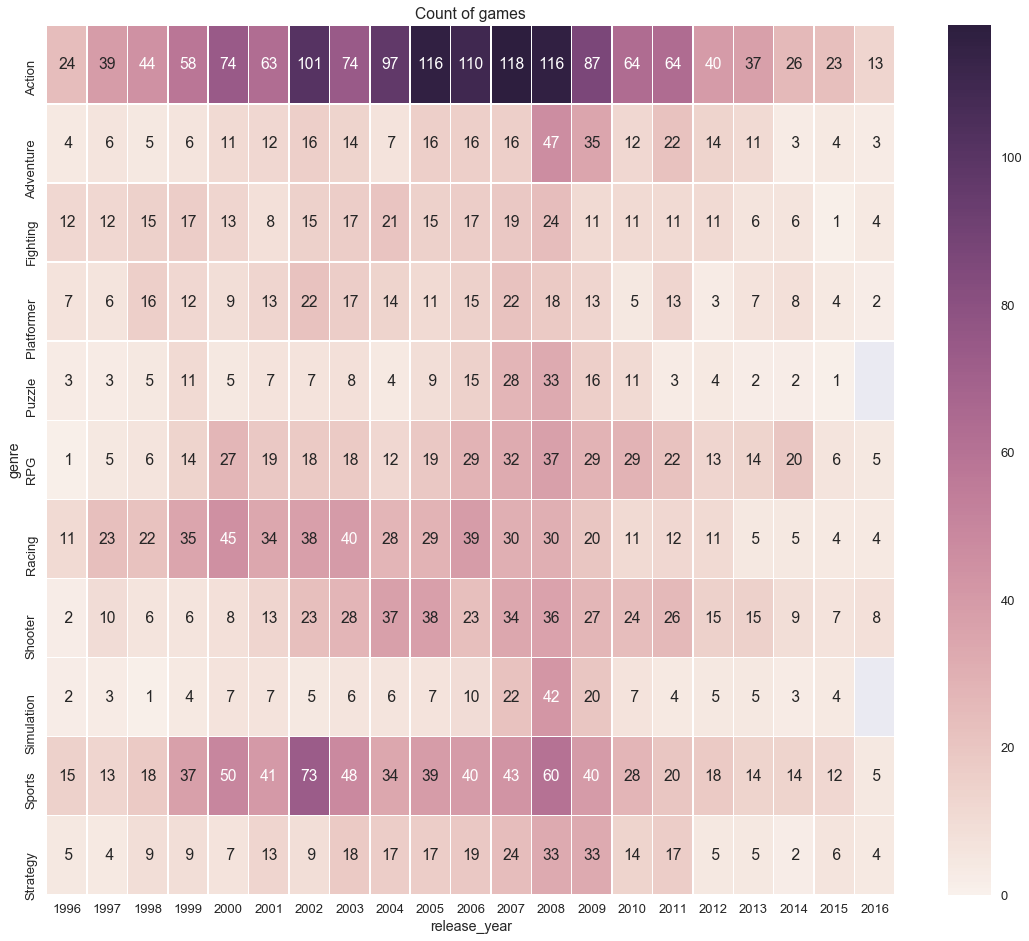

In [13]:
data_genre = data[data.genre.isin(large_genres.keys())]
table_count = pd.pivot_table(data_genre,values=['score'],index=['genre'],columns=['release_year'],aggfunc='count',margins=False)
plt.figure(figsize=(19,16))
sns.heatmap(table_count.score,linewidths=.5,annot=True,fmt='2.0f',vmin=0)
plt.title('Count of games')